In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ex2data2.txt", header=None)
narray = np.array(df.values)

narray

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

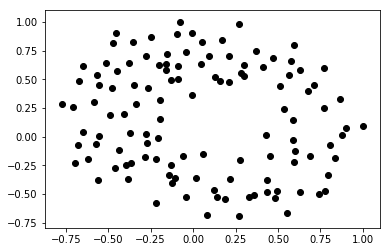

In [3]:
x_normed = narray / narray.max(axis=0)

plt.scatter(x_normed[ : , 0], x_normed[: ,1],  color='black')

plt.show()

In [ ]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(( X1.shape[0], sum(range(degree + 2)) ))
    curr_column = 1
    for i in xrange(1, degree + 1):
        for j in xrange(i+1):
            out[:,curr_column] = np.power(X1,i-j) * np.power(X2,j)
            curr_column += 1

    return out

In [4]:
def plotData(X, y):
    pos = np.where(y==1)
    neg = np.where(y==0)
    
    p1 = plt.plot(X[pos,0], X[pos,1], marker='+', markersize=9, color='g')[0]
    p2 = plt.plot(X[neg,0], X[neg,1], marker='o', markersize=7, color='r')[0]


    return plt, p1, p2

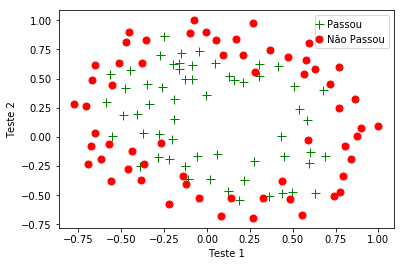

In [6]:
plt, p1, p2 = plotData(x_normed[ :  , :-1], x_normed[ : , -1])

# # Labels and Legend
plt.xlabel('Teste 1')
plt.ylabel('Teste 2')
plt.legend((p1, p2), ('Passou', 'Não Passou'), numpoints=1, handlelength=0)

plt.show()

In [ ]:
def plotDecisionBoundary(theta, X, y):
    fig = plt.figure()

    plt, p1, p2 = pd.plotData(X[:,1:3], y)

    plt.hold(True)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])

        # Calculate the decision boundary line
        plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        p3 = plt.plot(plot_x, plot_y)
        
        # Legend, specific for the exercise
        plt.legend((p1, p2, p3[0]), ('Admitted', 'Not Admitted', 'Decision Boundary'), numpoints=1, handlelength=0.5)

        plt.axis([30, 100, 30, 100])

        plt.show(block=False)
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros(( len(u), len(v) ))
        # Evaluate z = theta*x over the grid
        for i in xrange(len(u)):
            for j in xrange(len(v)):
                z[i,j] = np.dot(mf.mapFeature(np.array([u[i]]), np.array([v[j]])),theta)
        z = np.transpose(z) # important to transpose z before calling contour

        # Plot z = 0
        # Notice you need to specify the level 0
        # we get collections[0] so that we can display a legend properly
        p3 = plt.contour(u, v, z, levels=[0], linewidth=2).collections[0]
        
        # Legend, specific for the exercise
        plt.legend((p1,p2, p3),('y = 1', 'y = 0', 'Decision Boundary'), numpoints=1, handlelength=0)

        plt.show(block=False)

    plt.hold(False) # prevents further drawing on plot

In [ ]:
def predict(row, coefs):
    z = coefs[0]
    for i in range(len(row)-1):
        z += coefs[i + 1] * row[i]
    ypred = 1 / (1 + np.exp(-z))
    return ypred

In [ ]:
lambdas = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
list_lambd = []
list_eqm = []
for lambd in lambdas:
    coefs = coefs_OLS(X,Y, lambd)
    Ypred = X.dot(coefs)
    erro = Y - Ypred
    erroQuad = erro**2
    eqm = np.mean(erroQuad)
    list_lambd.append(lambd)
    list_eqm.append(eqm)
    
plt.plot(list_lambd, list_eqm)
plt.xlabel("Lambda")
plt.ylabel("EQM")
plt.show()